In [43]:
import sys
sys.path.append('/Users/gbibim/Here/hpt')

# List all modules and packages available at this path
import os
print(os.listdir('/Users/gbibim/Here/hpt'))


['outparquet', 'LICENSE', 'requirements.txt', 'ZJets.ipynb', 'pyproject.toml', 'README.md', '.gitignore', 'print_parquet.py', 'outfiles', '.git', 'data', 'src']


In [44]:

from hpt import utils

#import mplhep as hep
import matplotlib.ticker as mticker
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import mplhep as hep
from pathlib import Path
import hist
import pandas as pd

formatter = mticker.ScalarFormatter(useMathText=True)
formatter.set_powerlimits((-3, 3))
plt.rcParams.update({"font.size": 12})
plt.rcParams["lines.linewidth"] = 2
plt.rcParams["grid.color"] = "#CCCCCC"
plt.rcParams["grid.linewidth"] = 0.5
plt.rcParams["figure.edgecolor"] = "none"

In [45]:
# automatically reloads imported files on edits
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [46]:
vpt_axis = hist.axis.Regular(80, 0, 1000, name="pt", label="Z pT [GeV]")
cat_axis = hist.axis.StrCategory([], name="cat", growth=True)

In [74]:
MAIN_DIR = "/Users/gbibim/Here/genZ"
dir_name = "data"
year = "2023"
path_to_dir = f"{MAIN_DIR}/{dir_name}/"
is_LO = True # True for LO, False for NLO
Zto = "2Nu" # or 2Nu

if Zto=="2Q":
    if is_LO:
        samples = {
            "Zto2Q-4Jets_HT-200-400": [
                "Zto2Q-4Jets_HT-200to400",
            ],
            "Zto2Q-4Jets_HT-400-600": [
                "Zto2Q-4Jets_HT-400to600",
            ],
            "Zto2Q-4Jets_HT-600-800": [
                "Zto2Q-4Jets_HT-600to800",
            ],
            "Zto2Q-4Jets_HT-800-Inf": [
                "Zto2Q-4Jets_HT-800",
            ],
        }
    else:
        samples = {
            "Zto2Q-2Jets_PTQQ-100-200": [
                "Zto2Q-2Jets_PTQQ-100to200_1J",
                "Zto2Q-2Jets_PTQQ-100to200_2J",
            ],
            "Zto2Q-2Jets_PTQQ-200-400": [
                "Zto2Q-2Jets_PTQQ-200to400_1J",
                "Zto2Q-2Jets_PTQQ-200to400_2J",
            ],
            "Zto2Q-2Jets_PTQQ-400-600": [
                "Zto2Q-2Jets_PTQQ-400to600_1J",
                "Zto2Q-2Jets_PTQQ-400to600_2J",
            ],
            "Zto2Q-2Jets_PTQQ-600": [
                "Zto2Q-2Jets_PTQQ-600_1J",
                "Zto2Q-2Jets_PTQQ-600_2J",
            ],
        }
elif Zto=="2Nu":
    if is_LO:
        samples = {
            "Zto2Nu-4Jets_HT-100-200": [
                "Zto2Nu-4Jets_HT-100to200",
            ],
            "Zto2Nu-4Jets_HT-200-400": [
                "Zto2Nu-4Jets_HT-200to400",
            ],
            "Zto2Nu-4Jets_HT-400-800": [
                "Zto2Nu-4Jets_HT-400to800",
            ],
            "Zto2Nu-4Jets_HT-800-1500": [
                "Zto2Nu-4Jets_HT-800to1500",
            ],
        }
    else:
        samples = {
            #"Zto2Nu-2Jets_PTNuNu-40-100": [
            #    "Zto2Nu-2Jets_PTNuNu-40to100_1J",
            #    "Zto2Nu-2Jets_PTNuNu-40to100_2J",
            #],
            "Zto2Nu-2Jets_PTNuNu-100-200": [
                "Zto2Nu-2Jets_PTNuNu-100to200_1J",
                "Zto2Nu-2Jets_PTNuNu-100to200_2J",
            ],
            "Zto2Nu-2Jets_PTNuNu-200-400": [
                "Zto2Nu-2Jets_PTNuNu-200to400_1J",
                "Zto2Nu-2Jets_PTNuNu-200to400_2J",
            ],
            "Zto2Nu-2Jets_PTNuNu-400-600": [
                "Zto2Nu-2Jets_PTNuNu-400to600_1J",
                "Zto2Nu-2Jets_PTNuNu-400to600_2J",
            ],
            "Zto2Nu-2Jets_PTNuNu-600": [
                "Zto2Nu-2Jets_PTNuNu-600_1J",
                "Zto2Nu-2Jets_PTNuNu-600_2J",
            ],
        }
dirs = {path_to_dir: samples}

load_columns = [
    ("weight", 1),
    ("GenVPt", 1),
]


In [76]:
samples = {
    "Zto2Q": {
        "LO": [
            "Zto2Q-4Jets_HT-200to400", 
            "Zto2Q-4Jets_HT-400to600",
            "Zto2Q-4Jets_HT-600to800",
            "Zto2Q-4Jets_HT-800",
            ],
        "NLO": [
            "Zto2Q-2Jets_PTQQ-100to200_1J",
            "Zto2Q-2Jets_PTQQ-100to200_2J",
            "Zto2Q-2Jets_PTQQ-200to400_1J",
            "Zto2Q-2Jets_PTQQ-200to400_2J",
            "Zto2Q-2Jets_PTQQ-400to600_1J",
            "Zto2Q-2Jets_PTQQ-400to600_2J",
            "Zto2Q-2Jets_PTQQ-600_1J",
            "Zto2Q-2Jets_PTQQ-600_2J",
        ],
    },
    "Zto2Nu": {
        "LO": [
            "Zto2Nu-4Jets_HT-100to200",
            "Zto2Nu-4Jets_HT-200to400",
            "Zto2Nu-4Jets_HT-400to800",
            "Zto2Nu-4Jets_HT-800to1500",
        ],
        "NLO": [
            "Zto2Nu-2Jets_PTNuNu-100to200_1J",
            "Zto2Nu-2Jets_PTNuNu-100to200_2J",
            "Zto2Nu-2Jets_PTNuNu-200to400_1J",
            "Zto2Nu-2Jets_PTNuNu-200to400_2J",
            "Zto2Nu-2Jets_PTNuNu-400to600_1J",
            "Zto2Nu-2Jets_PTNuNu-400to600_2J",
            "Zto2Nu-2Jets_PTNuNu-600_1J",
            "Zto2Nu-2Jets_PTNuNu-600_2J",
        ],
    }
}

In [82]:
for key, value in samples.items():
    print(key)
    print(value)
    for label, selector in value.items():
        print(selector)
        print(label)

Zto2Q
{'LO': ['Zto2Q-4Jets_HT-200to400', 'Zto2Q-4Jets_HT-400to600', 'Zto2Q-4Jets_HT-600to800', 'Zto2Q-4Jets_HT-800'], 'NLO': ['Zto2Q-2Jets_PTQQ-100to200_1J', 'Zto2Q-2Jets_PTQQ-100to200_2J', 'Zto2Q-2Jets_PTQQ-200to400_1J', 'Zto2Q-2Jets_PTQQ-200to400_2J', 'Zto2Q-2Jets_PTQQ-400to600_1J', 'Zto2Q-2Jets_PTQQ-400to600_2J', 'Zto2Q-2Jets_PTQQ-600_1J', 'Zto2Q-2Jets_PTQQ-600_2J']}
['Zto2Q-4Jets_HT-200to400', 'Zto2Q-4Jets_HT-400to600', 'Zto2Q-4Jets_HT-600to800', 'Zto2Q-4Jets_HT-800']
LO
['Zto2Q-2Jets_PTQQ-100to200_1J', 'Zto2Q-2Jets_PTQQ-100to200_2J', 'Zto2Q-2Jets_PTQQ-200to400_1J', 'Zto2Q-2Jets_PTQQ-200to400_2J', 'Zto2Q-2Jets_PTQQ-400to600_1J', 'Zto2Q-2Jets_PTQQ-400to600_2J', 'Zto2Q-2Jets_PTQQ-600_1J', 'Zto2Q-2Jets_PTQQ-600_2J']
NLO
Zto2Nu
{'LO': ['Zto2Nu-4Jets_HT-100to200', 'Zto2Nu-4Jets_HT-200to400', 'Zto2Nu-4Jets_HT-400to800', 'Zto2Nu-4Jets_HT-800to1500'], 'NLO': ['Zto2Nu-2Jets_PTNuNu-100to200_1J', 'Zto2Nu-2Jets_PTNuNu-100to200_2J', 'Zto2Nu-2Jets_PTNuNu-200to400_1J', 'Zto2Nu-2Jets_PTNuNu-200to4

In [81]:
samples["Zto2Nu"]["LO"]

['Zto2Nu-4Jets_HT-100to200',
 'Zto2Nu-4Jets_HT-200to400',
 'Zto2Nu-4Jets_HT-400to800',
 'Zto2Nu-4Jets_HT-800to1500']

In [106]:
from os import listdir
from pathlib import Path
import warnings

data_dir = Path(path_to_dir) / year
full_samples_list = listdir(data_dir)  # get all directories in data_dir
events_dict = {}
columns = utils.format_columns(load_columns)

for key, value in samples.items():
    events_dict[key] = {}
    for label, selector in value.items():
        events_dict[key][label] = {}
        for sample in selector:
            events_dict[key][label][sample] = []
            sample_path = data_dir / sample
            parquet_path, pickles_path = sample_path / "parquet", sample_path / "pickles"

            # no parquet directory?
            if not parquet_path.exists():
                warnings.warn(f"No parquet directory for {sample}!", stacklevel=1)
                continue

            print(f"Loading {sample}")
            events = pd.read_parquet(parquet_path, columns=columns)

            # no events?
            if not len(events):
                warnings.warn(f"No events for {sample}!", stacklevel=1)
                continue

            n_events = utils.get_nevents(pickles_path, year, sample)
            events["weight_nonorm"] = events["weight"]
            events["finalWeight"] = events["weight"] / n_events

            #events_dict[key][label][sample].append(events)
            events_dict[key][label][sample] =+ events
            print(f"Loaded {sample: <50}: {len(events)} entries")



Loading Zto2Q-4Jets_HT-200to400
Loaded Zto2Q-4Jets_HT-200to400                           : 4273017 entries
Loading Zto2Q-4Jets_HT-400to600
Loaded Zto2Q-4Jets_HT-400to600                           : 3873904 entries
Loading Zto2Q-4Jets_HT-600to800
Loaded Zto2Q-4Jets_HT-600to800                           : 4111998 entries
Loading Zto2Q-4Jets_HT-800
Loaded Zto2Q-4Jets_HT-800                                : 4069506 entries
Loading Zto2Q-2Jets_PTQQ-100to200_1J
Loaded Zto2Q-2Jets_PTQQ-100to200_1J                      : 18998967 entries
Loading Zto2Q-2Jets_PTQQ-100to200_2J
Loaded Zto2Q-2Jets_PTQQ-100to200_2J                      : 18555240 entries
Loading Zto2Q-2Jets_PTQQ-200to400_1J
Loaded Zto2Q-2Jets_PTQQ-200to400_1J                      : 7929898 entries
Loading Zto2Q-2Jets_PTQQ-200to400_2J
Loaded Zto2Q-2Jets_PTQQ-200to400_2J                      : 20014819 entries
Loading Zto2Q-2Jets_PTQQ-400to600_1J
Loaded Zto2Q-2Jets_PTQQ-400to600_1J                      : 971914 entries
Loading Zto2Q-2

In [92]:
events_dict

{'Zto2Q': {'LO': {'Zto2Q-4Jets_HT-200to400': [             weight   GenVPt weight_nonorm finalWeight
                      0        0                          
    0        19097300.0   87.250    19097300.0    4.469278
    1        19097300.0  121.500    19097300.0    4.469278
    2        19097300.0   73.250    19097300.0    4.469278
    3        19097300.0  125.250    19097300.0    4.469278
    4        19097300.0   45.250    19097300.0    4.469278
    ...             ...      ...           ...         ...
    4273012  19097300.0   32.625    19097300.0    4.469278
    4273013  19097300.0   79.250    19097300.0    4.469278
    4273014  19097300.0   67.250    19097300.0    4.469278
    4273015  19097300.0  110.250    19097300.0    4.469278
    4273016  19097300.0   64.250    19097300.0    4.469278
    
    [4273017 rows x 4 columns]],
   'Zto2Q-4Jets_HT-400to600': [            weight GenVPt weight_nonorm finalWeight
                     0      0                          
    0        2

In [51]:
file_name = "/Users/gbibim/Here/genZ/data/2023/Zto2Q-2Jets_PTQQ-100to200_1J/pickles/out_0.pkl"
with Path(f"{file_name}").open("rb") as file:
    outpickle1 = pickle.load(file)

In [54]:
def plot_h(hists, labels, density, title):
    fig, ax = plt.subplots(1, 1, figsize=(6, 5))
    for hkey, h in hists.items():
        hep.histplot(h, ax=ax, label=labels[hkey], density=density)
    ax.legend(title=f"Pre-Selection")
    if density:
        ax.set_ylabel("Density")
    else:
        ax.set_ylabel("Events")
        ax.set_yscale("log")
    ax.set_title(title)
    ax.xaxis.grid(True, which="major")
    ax.yaxis.grid(True, which="major")

In [111]:
h_vpt = hist.Hist(vpt_axis, cat_axis)
for key, value in samples.items():
    for label, selector in value.items():
        events = events_dict[key][label]
        for sample in selector:
            weight = events[sample]["finalWeight"][0]  # finalWeight is the weight after normalization
            vpt = events[sample]["GenVPt"][0]  # GenVPt is the Z pT
            h_vpt.fill(pt=vpt, cat=sample, weight=weight)

In [112]:
h_vpt

Hist(
  Regular(80, 0, 1000, name='pt', label='Z pT [GeV]'),
  StrCategory(['Zto2Q-4Jets_HT-200to400', 'Zto2Q-4Jets_HT-400to600', 'Zto2Q-4Jets_HT-600to800', 'Zto2Q-4Jets_HT-800', 'Zto2Q-2Jets_PTQQ-100to200_1J', 'Zto2Q-2Jets_PTQQ-100to200_2J', 'Zto2Q-2Jets_PTQQ-200to400_1J', 'Zto2Q-2Jets_PTQQ-200to400_2J', 'Zto2Q-2Jets_PTQQ-400to600_1J', 'Zto2Q-2Jets_PTQQ-400to600_2J', 'Zto2Q-2Jets_PTQQ-600_1J', 'Zto2Q-2Jets_PTQQ-600_2J', 'Zto2Nu-4Jets_HT-100to200', 'Zto2Nu-4Jets_HT-200to400', 'Zto2Nu-4Jets_HT-400to800', 'Zto2Nu-4Jets_HT-800to1500', 'Zto2Nu-2Jets_PTNuNu-100to200_1J', 'Zto2Nu-2Jets_PTNuNu-100to200_2J', 'Zto2Nu-2Jets_PTNuNu-200to400_1J', 'Zto2Nu-2Jets_PTNuNu-200to400_2J', 'Zto2Nu-2Jets_PTNuNu-400to600_1J', 'Zto2Nu-2Jets_PTNuNu-400to600_2J', 'Zto2Nu-2Jets_PTNuNu-600_1J', 'Zto2Nu-2Jets_PTNuNu-600_2J'], growth=True, name='cat'),
  storage=Double()) # Sum: 7556420.870736411 (7754037.616140823 with flow)

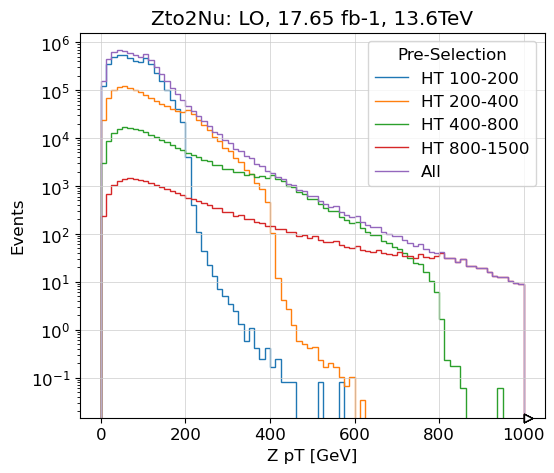

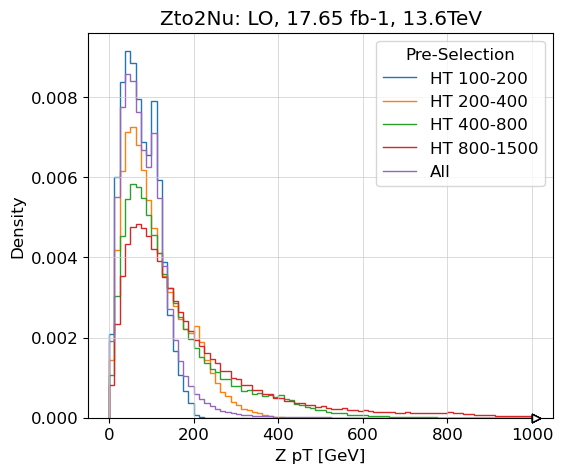

In [58]:
h_to_plot = h_vpt
lumi = 17650.0/1000
if Zto=="2Q":
    if is_LO:
        hists = {
            "200to400": h_to_plot[{"cat": "Zto2Q-4Jets_HT-200-400"}],
            "400to600": h_to_plot[{"cat": "Zto2Q-4Jets_HT-400-600"}],
            "600to800": h_to_plot[{"cat": "Zto2Q-4Jets_HT-600-800"}],
            "800": h_to_plot[{"cat": "Zto2Q-4Jets_HT-800-Inf"}],
        }
        hists["sum"] = sum([h for h in hists.values()])
        labels = {
            "200to400": "HT 200-400",
            "400to600": "HT 400-600",
            "600to800": "HT 600-800",
            "800": "HT 800-Inf", 
            "sum": "All",
        }
        title = f"Zto{Zto}: LO, {lumi} fb-1, 13.6TeV"
        plot_h(hists, labels, density=False, title=title)
        plot_h(hists, labels, density=True, title=title)
    else:
        hists = {
            "100to200": h_to_plot[{"cat": f"Zto2Q-2Jets_PTQQ-100-200"}],
            "200to400": h_to_plot[{"cat": f"Zto2Q-2Jets_PTQQ-200-400"}],
            "400to600": h_to_plot[{"cat": f"Zto2Q-2Jets_PTQQ-400-600"}],
            "600": h_to_plot[{"cat": f"Zto2Q-2Jets_PTQQ-600"}],
        }
        hists["sum"] = sum([h for h in hists.values()])
        labels = {
            "100to200": "PTQQ 100-200",
            "200to400": "PTQQ 200-400",
            "400to600": "PTQQ 400-600",
            "600": "PTQQ 600-Inf",
            "sum": "All",
        }
        title = f"Zto{Zto}: NLO, {lumi} fb-1, 13.6TeV"
        plot_h(hists, labels, density=False, title=title)
        plot_h(hists, labels, density=True, title=title)

elif Zto=="2Nu":
    if is_LO:
        hists = {
            "100to200": h_to_plot[{"cat": f"Zto2Nu-4Jets_HT-100-200"}],
            "200to400": h_to_plot[{"cat": f"Zto2Nu-4Jets_HT-200-400"}],
            "400to800": h_to_plot[{"cat": f"Zto2Nu-4Jets_HT-400-800"}],
            "800": h_to_plot[{"cat": f"Zto2Nu-4Jets_HT-800-1500"}],
        }
        hists["sum"] = sum([h for h in hists.values()])
        labels = {
            "100to200": "HT 100-200",
            "200to400": "HT 200-400",
            "400to800": "HT 400-800",
            "800": "HT 800-1500",
            "sum": "All",
        }
        title = f"Zto{Zto}: LO, {lumi} fb-1, 13.6TeV"
        plot_h(hists, labels, density=False, title=title)
        plot_h(hists, labels, density=True, title=title)
    else:
        hists = {
            "100to200": h_to_plot[{"cat": f"Zto2Nu-2Jets_PTNuNu-100-200"}],
            "200to400": h_to_plot[{"cat": f"Zto2Nu-2Jets_PTNuNu-200-400"}],
            "400to600": h_to_plot[{"cat": f"Zto2Nu-2Jets_PTNuNu-400-600"}],
            "600": h_to_plot[{"cat": f"Zto2Nu-2Jets_PTNuNu-600"}],
        }
        hists["sum"] = sum([h for h in hists.values()])
        labels = {
            "100to200": "PTNuNu 100-200",
            "200to400": "PTNuNu 200-400",
            "400to600": "PTNuNu 400-600",
            "600": "PTNuNu 600-Inf",
            "sum": "All",
        }
        title = f"Zto{Zto}: NLO, {lumi} fb-1, 13.6TeV"
        plot_h(hists, labels, density=False, title=title)
        plot_h(hists, labels, density=True, title=title)   

    #hists["lo"] = h_to_plot[{"cat": f"{v}to2Q_LO"}]
    #plot_h({"lo": hists["lo"], "nlo": hists["sum"]}, labels, density=False, title=f"{v}+Jets")

In [59]:
hists

{'100to200': Hist(Regular(80, 0, 1000, name='pt', label='Z pT [GeV]'), storage=Double()) # Sum: 4778138.802114092 (4830804.294465375 with flow),
 '200to400': Hist(Regular(80, 0, 1000, name='pt', label='Z pT [GeV]'), storage=Double()) # Sum: 1324687.5968216662 (1340693.8537250913 with flow),
 '400to800': Hist(Regular(80, 0, 1000, name='pt', label='Z pT [GeV]'), storage=Double()) # Sum: 229730.1117591654 (232803.5129823691 with flow),
 '800': Hist(Regular(80, 0, 1000, name='pt', label='Z pT [GeV]'), storage=Double()) # Sum: 23639.049012050786 (24074.60315489896 with flow),
 'sum': Hist(Regular(80, 0, 1000, name='pt', label='Z pT [GeV]'), storage=Double()) # Sum: 6356195.559706974 (6428376.264327735 with flow)}